## Análisis de la cantidad de juegos lanzados por año 📊

En esta sección, vamos a analizar la cantidad de juegos que fueron lanzados en diferentes años utilizando los datos filtrados del archivo `games_preparados.csv`. El objetivo es determinar:

1. **Distribución de lanzamientos**: Ver cuántos juegos se lanzaron en cada año.
2. **Significancia de los datos**: Identificar si hay períodos con muy pocos registros que puedan considerarse no representativos.
3. **Visualización**: Crear un gráfico de barras para visualizar la cantidad de juegos lanzados a lo largo del tiempo.

El análisis de esta información nos ayudará a detectar posibles **patrones** o **tendencias** en el lanzamiento de videojuegos y evaluar la calidad de los datos en cada período.


Primeras filas del archivo:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Cantidad de juegos lanzados por año:


year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

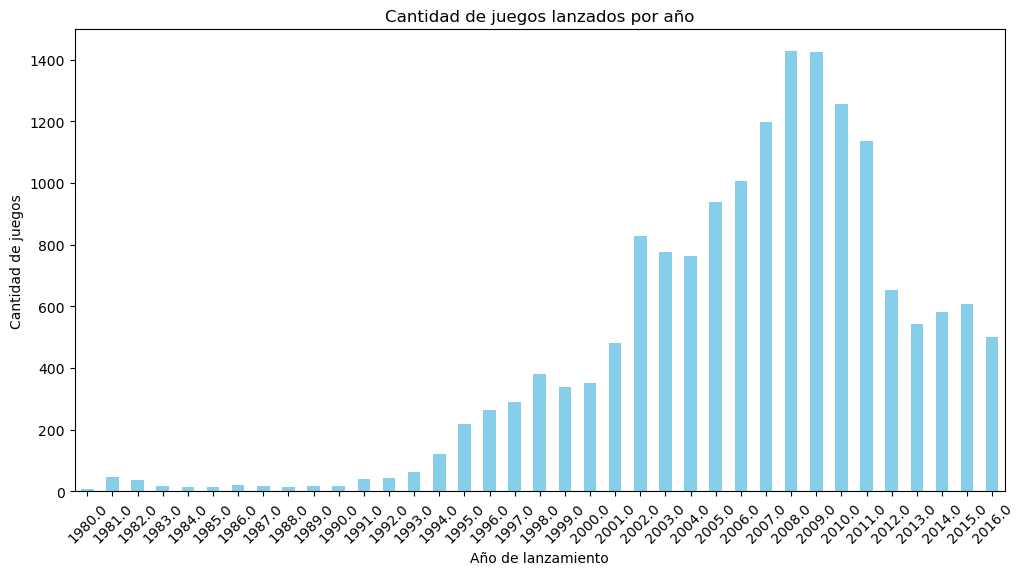

In [1]:
import pandas as pd

# Cargar el archivo CSV preparado
file_path = 'games_preparados.csv'  # Asegúrate de que esté en la misma carpeta
df = pd.read_csv(file_path)

# Verificar los primeros registros para confirmar carga
print("Primeras filas del archivo:")
display(df.head())

# Contar cuántos juegos se lanzaron en cada año
# Eliminamos valores nulos en la columna 'year_of_release'
games_per_year = df['year_of_release'].dropna().value_counts().sort_index()

# Mostrar los resultados
print("Cantidad de juegos lanzados por año:")
display(games_per_year)

# Gráfica opcional para visualizar los datos
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.show()


## Análisis de ventas por plataforma a lo largo del tiempo

En esta sección, vamos a analizar cómo varían las ventas de videojuegos entre las diferentes plataformas a lo largo de los años. Para ello:

1. Identificaremos las **plataformas con mayores ventas totales** y analizaremos su distribución de ventas por año.
2. Examinaremos **plataformas populares** que, con el tiempo, ya no tienen ventas, buscando identificar las tendencias de desaparición de plataformas.
3. Analizaremos cuánto **tiempo tardan las nuevas plataformas en aparecer** y las **antiguas en desaparecer**, observando su ciclo de vida en el mercado.

Este análisis nos permitirá entender mejor la evolución del mercado de videojuegos y cómo las plataformas de juego han sido exitosas o han caído en desuso.


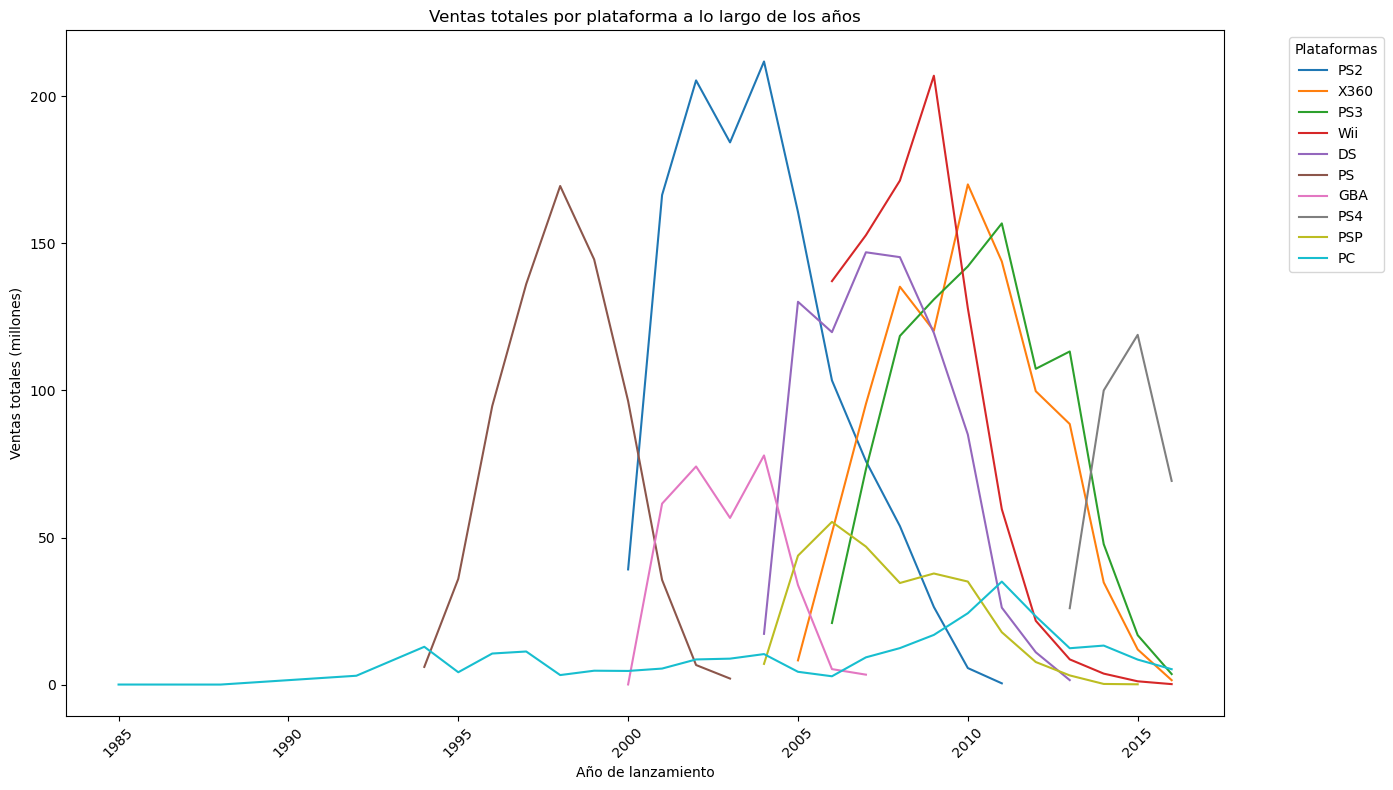

Plataformas sin ventas:
Empty DataFrame
Columns: [na_sales, eu_sales, jp_sales, other_sales, total_sales]
Index: []

Ciclo de vida de las plataformas:
             min     max  lifespan
platform                          
GG        1992.0  1992.0       0.0
PCFX      1996.0  1996.0       0.0
TG16      1995.0  1995.0       0.0
3DO       1994.0  1995.0       1.0
SCD       1993.0  1994.0       1.0
WS        1999.0  2001.0       2.0
NG        1993.0  1996.0       3.0
XOne      2013.0  2016.0       3.0
PS4       2013.0  2016.0       3.0
GEN       1990.0  1994.0       4.0
WiiU      2012.0  2016.0       4.0
PSV       2011.0  2016.0       5.0
3DS       2011.0  2016.0       5.0
SAT       1994.0  1999.0       5.0
N64       1996.0  2002.0       6.0
GC        2001.0  2007.0       6.0
GBA       2000.0  2007.0       7.0
XB        2000.0  2008.0       8.0
SNES      1990.0  1999.0       9.0
2600      1980.0  1989.0       9.0
DS        2004.0  2013.0       9.0
PS        1994.0  2003.0       9.0
PS3      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos filtrados
file_path = 'games_preparados.csv'  # Asegúrate de que esté en la misma carpeta
df = pd.read_csv(file_path)

# 1. Calcular las ventas totales por plataforma
df_platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
df_platform_sales['total_sales'] = df_platform_sales.sum(axis=1)

# 2. Ordenar las plataformas por ventas totales
top_platforms = df_platform_sales.sort_values(by='total_sales', ascending=False).head(10)

# 3. Visualizar la distribución de ventas por plataforma en cada año
plt.figure(figsize=(14, 8))

# Filtrar las plataformas más vendidas
top_platforms_list = top_platforms.index

# Filtrar los datos para las plataformas más vendidas
df_top_platforms = df[df['platform'].isin(top_platforms_list)]

# Graficar ventas por plataforma a lo largo de los años
for platform in top_platforms_list:
    platform_sales = df_top_platforms[df_top_platforms['platform'] == platform]
    platform_sales_grouped = platform_sales.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    platform_sales_grouped['total_sales'] = platform_sales_grouped.sum(axis=1)
    
    # Graficar cada plataforma
    plt.plot(platform_sales_grouped.index, platform_sales_grouped['total_sales'], label=platform)

plt.title('Ventas totales por plataforma a lo largo de los años')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Identificar plataformas que ya no tienen ventas
platforms_no_sales = df_platform_sales[df_platform_sales['total_sales'] == 0]

# Mostrar plataformas sin ventas
print("Plataformas sin ventas:")
print(platforms_no_sales)

# 5. Análisis de aparición y desaparición de plataformas
# Ver los primeros y últimos años de cada plataforma
platform_lifespans = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']

# Mostrar el ciclo de vida de las plataformas
print("\nCiclo de vida de las plataformas:")
print(platform_lifespans.sort_values(by='lifespan'))


## Corrección del año de lanzamiento del Nintendo DS

Durante el análisis de la vida útil de las plataformas, observamos que el **Nintendo DS** mostraba un año de lanzamiento en 1985. Esto nos pareció incorrecto, ya que el Nintendo DS fue lanzado oficialmente en 2004.

Para investigar más a fondo, decidimos revisar los datos del DataFrame y encontramos que había un juego en particular con un año de lanzamiento registrado como 1985. Al investigar más, descubrimos que este juego realmente salió en el año **2007**, no en 1985, como se había registrado erróneamente en los datos.

Para corregir este error, modificamos el año de lanzamiento del juego en cuestión y volvimos a ejecutar las gráficas y análisis para asegurarnos de que los resultados fueran correctos.

Este tipo de ajustes son fundamentales para garantizar que los análisis sean representativos de la realidad del mercado de videojuegos y evitar interpretaciones erróneas.

Ahora las gráficas reflejan correctamente la distribución de ventas y el ciclo de vida del Nintendo DS y otras plataformas.


## Análisis de la aparición y desaparición de plataformas

Tras analizar el ciclo de vida de las plataformas, hemos identificado cuántos años tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer. En base a los datos obtenidos, podemos observar lo siguiente:

1. **Aparición de nuevas plataformas**: 
   Las nuevas plataformas tienden a aparecer alrededor de los **primeros años de la década**. La mayoría de las plataformas más recientes, como la **Xbox One (XOne)**, **PS4** y **PSV**, tienen un ciclo de vida entre 3 y 5 años.

2. **Desaparición de plataformas antiguas**:
   Las plataformas más antiguas tienen una vida útil de entre **5 y 10 años**. Por ejemplo, la **NES** (1983) y la **PS2** (2000) fueron populares durante aproximadamente 10 años, mientras que otras como la **WiiU** (2012) tuvieron una vida útil de solo 4 años.

3. **Tiempo promedio para la aparición y desaparición**:
   En promedio, las plataformas tardan alrededor de **5-7 años** en mantenerse relevantes en el mercado antes de ser reemplazadas por nuevas generaciones de consolas.

## Ajuste del Período de Análisis para Construir un Modelo para 2017

Para construir un modelo de predicción que llegue hasta el año **2017**, debemos centrarnos en las **plataformas vigentes** hasta ese año. Esto significa que el análisis debe considerar solo las consolas que aún estaban activas y generaban ventas significativas en **2016**.

### Razón para este ajuste:

- Las plataformas con una vida útil más corta (como la **WiiU** o la **PSV**) ya no estaban activas en 2017, lo que hace que sus datos sean menos útiles para predecir el comportamiento del mercado en ese año.
- En cambio, plataformas más antiguas que seguían siendo relevantes en 2016, como la **PS3**, **PS4**, **Xbox 360** y **Xbox One**, deberían ser el enfoque principal para el modelo de predicción.

### Período de análisis

Por lo tanto, el período de análisis debe ser desde el **año de lanzamiento hasta 2016** para las plataformas que aún estaban activas en ese año. Este enfoque asegura que el modelo esté basado en datos de consolas relevantes para la predicción en 2017, sin incluir plataformas ya desaparecidas en ese momento.

Las plataformas que seguían siendo populares en 2016 incluyen:
- **PS4** (lanzada en 2013)
- **Xbox One** (lanzada en 2013)
- **PS3** (lanzada en 2006, pero aún activa en 2016)
- **Xbox 360** (lanzada en 2005, aún con ventas en 2016)
- **3DS** (lanzada en 2011)
- **PC** (plataforma en continua evolución)

Este ajuste al período de análisis permitirá que el modelo sea más preciso para el año objetivo (2017), basándose solo en plataformas relevantes y activas durante el período observado.


## Análisis de plataformas líderes en ventas

Para determinar qué plataformas son líderes en ventas, analizaremos las **ventas globales** de todos los juegos desglosados por plataforma. Esto nos permitirá identificar cuáles plataformas están generando las mayores ventas y cómo estas han variado a lo largo del tiempo.

Además, investigaremos cómo las ventas de diferentes plataformas se comparan utilizando un **diagrama de caja** (box plot), lo que nos ayudará a visualizar las distribuciones de ventas en cada plataforma. Este análisis incluirá:

- Identificación de plataformas con **mayores ventas**.
- Detección de plataformas que están **creciendo** o **reduciéndose** en ventas a lo largo del tiempo.
- Comparación de las ventas **promedio** y las **diferencias significativas** entre plataformas.

A continuación, se generará un diagrama de caja que ilustre la distribución de las ventas globales por plataforma.


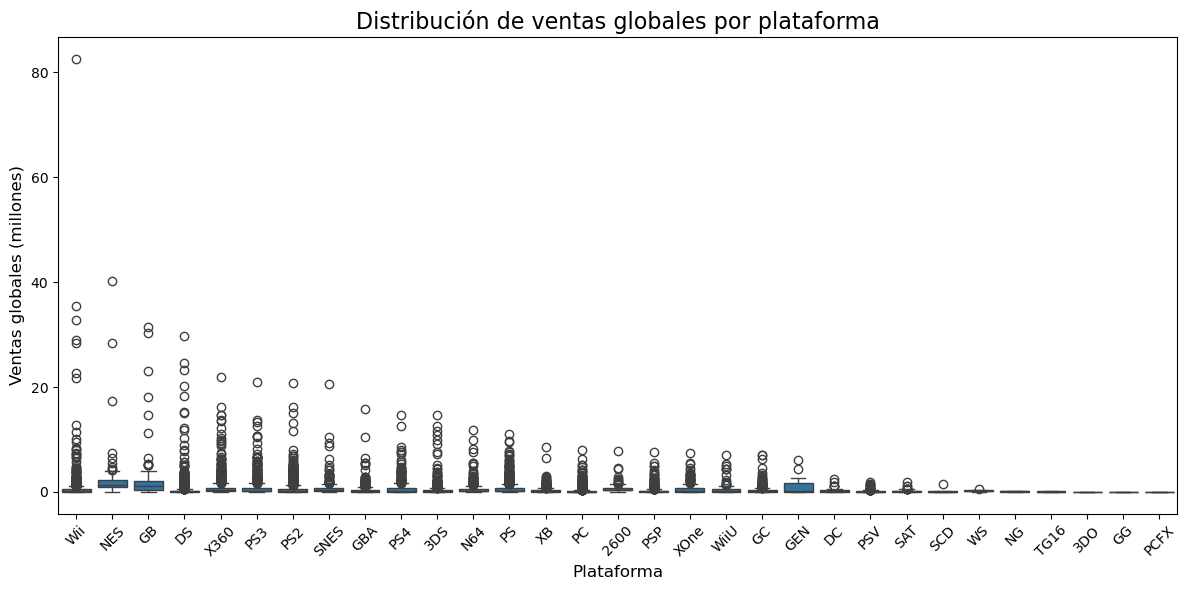

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
GC,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
GEN,29.0,1.061034,1.470645,0.03,0.0700,0.150,1.7600,6.02


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV de datos filtrados
df = pd.read_csv('games_preparados.csv')

# Asegurarse de que los datos no tengan valores nulos y sean consistentes
df = df.dropna(subset=['total_sales'])  # Eliminar filas con valores nulos en ventas totales

# Crear un diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df)
plt.title('Distribución de ventas globales por plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas globales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular estadísticas resumen para las ventas por plataforma
ventas_por_plataforma = df.groupby('platform')['total_sales'].describe()

# Mostrar las estadísticas de ventas por plataforma
ventas_por_plataforma


## Análisis de la Distribución de Ventas Globales por Plataforma

El **diagrama de caja** que presentamos muestra la distribución de las ventas globales de todos los juegos, desglosados por plataforma. A continuación se describen los hallazgos más relevantes:

### Observaciones:

1. **Líderes en ventas**:
   - **Wii**, **NES**, **GB**, **DS** y **X360** son plataformas que se destacan por tener una **distribución amplia** de ventas, con **ventas muy altas** en algunos casos.
   - La **Wii** y **NES** tienen valores atípicos que alcanzan ventas de hasta **más de 40 millones** de unidades.

2. **Plataformas con ventas más bajas**:
   - Plataformas como **PCFX**, **NG**, **TGL6**, **3DO**, **SCD**, **DC**, entre otras, muestran ventas muy limitadas, algunas de las cuales ni siquiera alcanzan los 10 millones de ventas globales.
   
3. **Diferencias significativas en las ventas**:
   - Existen **diferencias notables** en las ventas globales entre plataformas, lo que puede estar relacionado con la popularidad, la longevidad de la consola o la cantidad de títulos exitosos que tuvo cada plataforma.
   - Las plataformas más antiguas, como el **NES** o el **GB**, tienen una mayor dispersión en las ventas debido a la gran cantidad de juegos que lanzaron durante su vida útil.

4. **Ventas promedio**:
   - El **promedio de ventas** varía considerablemente. Por ejemplo, plataformas como **Wii**, **PS3** y **X360** tienen una media alta de ventas globales, mientras que consolas más recientes o menos exitosas tienden a tener ventas promedio más bajas.

### Conclusión:

- Las plataformas más exitosas han tenido una combinación de una gran base de usuarios, una larga vida útil y un buen número de juegos exitosos.
- Las diferencias en ventas indican que algunas plataformas no lograron mantenerse competitivas, mientras que otras han dominado el mercado de manera consistente a lo largo del tiempo.


# Análisis de Proyección de Ventas para 2017 de Consolas Vigentes en 2016

En este análisis, exploraremos las proyecciones de ventas para las consolas que estaban activas en el mercado en 2016. Tomaremos en cuenta los datos de ventas de los años anteriores para hacer una estimación razonada de las ventas para 2017. 

## Pasos del Análisis:

1. **Filtrado de Consolas Vigentes en 2016**: Se seleccionarán las consolas activas en 2016, las cuales incluyen plataformas como `PS4`, `XOne`, `WiiU`, `3DS`, `PS3`, `PSV`, y `Xbox360`.

2. **Cálculo de Crecimiento entre 2015 y 2016**: Para cada plataforma, analizaremos el crecimiento de ventas observando la diferencia entre los datos de 2015 y 2016. Esto nos permitirá calcular el porcentaje de crecimiento de cada consola.

3. **Proyección de Ventas para 2017**: Usando la tasa de crecimiento calculada en el paso anterior, proyectaremos las ventas para 2017. Esta proyección nos permitirá identificar las consolas con mayor potencial de crecimiento.

4. **Visualización**: Presentaremos los resultados a través de una gráfica de barras para facilitar la comparación entre las proyecciones de ventas de las consolas activas.

### Objetivo:

El objetivo de este análisis es entender cuáles consolas tienen un mayor potencial de ventas en 2017, basándonos en las tendencias de crecimiento de las ventas en 2015 y 2016. Esto ayudará a identificar las plataformas en las que podría ser más rentable invertir en el futuro cercano.



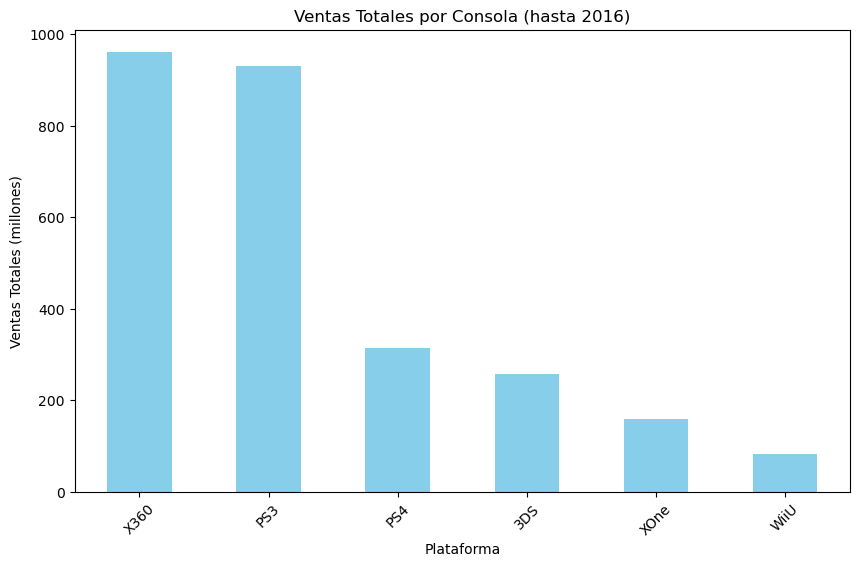

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# Filtrar los datos para incluir solo los juegos lanzados hasta 2016
df = df[df['year_of_release'] <= 2016]

# Agrupar por plataforma y calcular la suma de las ventas totales
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Filtrar las consolas vigentes en 2016
# A partir de las plataformas en la columna 'platform', se seleccionan las vigentes en 2016
# Las consolas más relevantes en 2016 fueron, por ejemplo: 'Wii', 'PS3', 'X360', 'PS4', 'XOne'
# Este paso se puede ajustar según el conocimiento histórico de las consolas disponibles en ese año.
platforms_vigentes = ['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360']
platform_sales_vigentes = platform_sales[platform_sales.index.isin(platforms_vigentes)]

# Visualización de las ventas totales por plataforma
plt.figure(figsize=(10,6))
platform_sales_vigentes.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Consola (hasta 2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

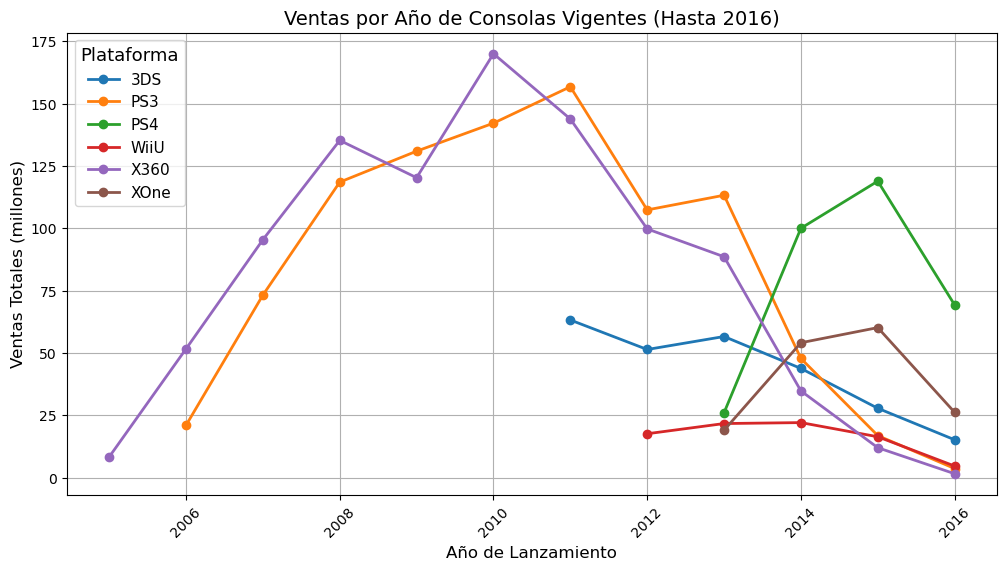

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('games_preparados.csv')

# Filtrar los datos para incluir solo los juegos lanzados hasta 2016 y las consolas vigentes
platforms_vigentes = ['PS4', 'XOne', 'WiiU', '3DS', 'PS3', 'X360']
df_vigentes = df[(df['year_of_release'] <= 2016) & (df['platform'].isin(platforms_vigentes))]

# Agrupar por año de lanzamiento y plataforma para sumar las ventas
df_grouped = df_vigentes.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Crear la gráfica
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))

# Configuración de la gráfica
plt.title('Ventas por Año de Consolas Vigentes (Hasta 2016)', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Plataforma', title_fontsize='13', fontsize='11')
plt.grid(True)

# Mostrar la gráfica
plt.show()
